In [69]:
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
bonesis.settings["parallel"] = 1 

# computing graph layout...


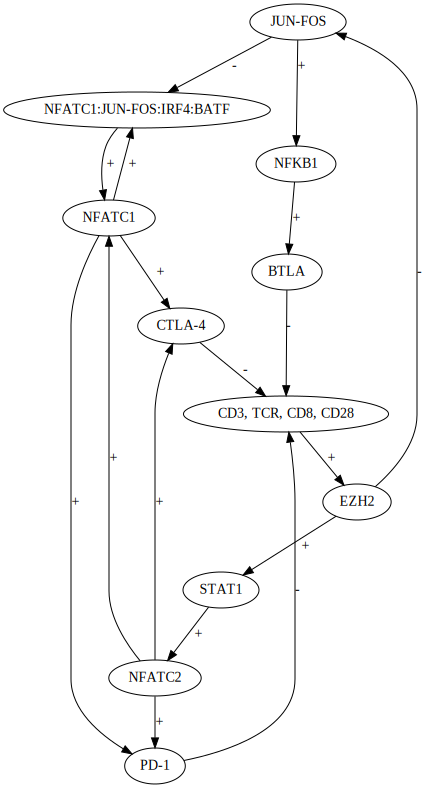

In [70]:
influences = [
("JUN-FOS","NFATC1:JUN-FOS:IRF4:BATF",dict(sign=-1)),  
("CD3, TCR, CD8, CD28","EZH2",dict(sign=1)),
("CTLA-4","CD3, TCR, CD8, CD28",dict(sign=-1)),
("NFATC1","CTLA-4",dict(sign=1)),
("NFATC1","PD-1",dict(sign=1)),
("NFATC1","NFATC1:JUN-FOS:IRF4:BATF",dict(sign=1)),
("NFATC1:JUN-FOS:IRF4:BATF","NFATC1",dict(sign=1)),
("PD-1","CD3, TCR, CD8, CD28",dict(sign=-1)),
("JUN-FOS","NFKB1",dict(sign=1)), 
("NFKB1","BTLA",dict(sign=1)),
("EZH2","JUN-FOS",dict(sign=-1)), 
("BTLA","CD3, TCR, CD8, CD28",dict(sign=-1)),
    
#("TBET-ZEB2","PD-1",dict(sign=-1)),
    
#("IL12-R","TBET-ZEB2",dict(sign=1)),
#("NFATC2","IL12-R",dict(sign=-1)),
("NFATC2","CTLA-4",dict(sign=1)),
("NFATC2","PD-1",dict(sign=1)),
("NFATC2","NFATC1",dict(sign=1)),

("STAT1","NFATC2",dict(sign=1)),
("EZH2","STAT1",dict(sign=1)),
]


bonesis_toy = bonesis.InfluenceGraph(influences)
bonesis_toy

In [71]:
#Mixture of dotplot and heatmap
observed_states={
    "zero": {"EZH2":0,"CD3, TCR, CD8, CD28":0,"CTLA-4":0,"IL2-R":0,"NFATC1:JUN-FOS:IRF4:BATF":0,"NFATC1":0,"PD-1":0,"BTLA":0,"JUN-FOS":0,"NFKB1":0,"TBET-ZEB2":0,"PRDM1":0,"BACH2":0,"FOXO1":0,"ID3":0,"BCL6":0,"TCF-1":0,"IL12-R":0,"NFATC2":0, "STAT1":0},
    "trans":{"CD3, TCR, CD8, CD28":0,"CTLA-4":0,"PD-1":0,"FOXO1":0,"IL12-R":0,"NFATC2":0,"JUN-FOS":0,"TBET-ZEB2":1,"STAT1":0},
    "mem": {"EZH2":0,"NFATC1":1,"NFKB1":1,"PRDM1":0,"BACH2":1,"NFATC2":0,"JUN-FOS":1,"TBET-ZEB2":0,"STAT1":0},
    "exh": {"EZH2":1,"CD3, TCR, CD8, CD28":1,"CTLA-4":1,"NFATC1":0,"PD-1":1,"NFKB1":0,"PRDM1":1,"FOXO1":1,"IL12-R":1,"NFATC2":1,"JUN-FOS":0,"STAT1":1},
}
pd.DataFrame.from_dict(observed_states, orient="index").fillna('')

,EZH2,"CD3, TCR, CD8, CD28",CTLA-4,IL2-R,NFATC1:JUN-FOS:IRF4:BATF,NFATC1,PD-1,BTLA,JUN-FOS,NFKB1,TBET-ZEB2,PRDM1,BACH2,FOXO1,ID3,BCL6,TCF-1,IL12-R,NFATC2,STAT1
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
mem,0.0,,,,,1.0,,,1,1.0,0.0,0.0,1.0,,,,,,0,0
exh,1.0,1.0,1.0,,,0.0,1.0,,0,0.0,,1.0,,1.0,,,,1.0,1,1
trans,,0.0,0.0,,,,0.0,,0,,1.0,,,0.0,,,,0.0,0,0


In [75]:
bo=bonesis.BoNesis(bonesis_toy, observed_states)

bo.fixed(~bo.obs("exh"))

~bo.obs("mem") >= ~bo.obs("trans") >= ~bo.obs("exh");

#~bo.obs("exh") >= ~bo.obs("mem")

#~bo.obs("zero") / ~bo.obs("mem")
#~bo.obs("zero") / ~bo.obs("trans")
#~bo.obs("zero") / ~bo.obs("exh");

In [76]:
for bn in bo.boolean_networks(limit=1): # limit is optional
    print(bn)

Grounding...done in 0.0s
BTLA <- 1
CD3, TCR, CD8, CD28 <- 1
CTLA-4 <- 1
EZH2 <- 1
JUN-FOS <- 0
NFATC1 <- 0
NFATC1:JUN-FOS:IRF4:BATF <- 1
NFATC2 <- 1
NFKB1 <- 0
PD-1 <- 1
STAT1 <- 1



In [77]:
solutions = list(bo.boolean_networks())
solutions_backup=solutions
pd.DataFrame(solutions)

Grounding...done in 0.0s


,BTLA,"CD3, TCR, CD8, CD28",CTLA-4,EZH2,JUN-FOS,NFATC1,NFATC1:JUN-FOS:IRF4:BATF,NFATC2,NFKB1,PD-1,STAT1
0,1,1,1,1,0,0,1,1,0,1,1
1,1,1,1,1,0,0,0,1,0,1,1
2,0,1,1,1,0,0,1,1,0,1,1
3,0,1,1,1,0,0,0,1,0,1,1
4,1,1,1,1,!EZH2,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40027,0,!BTLA,NFATC2,1,0,0,!JUN-FOS&NFATC1,1,JUN-FOS,NFATC2,1
40028,0,!BTLA,1,1,!EZH2,0,!JUN-FOS&NFATC1,1,JUN-FOS,1,1
40029,0,!BTLA,1,1,!EZH2,0,!JUN-FOS&NFATC1,1,JUN-FOS,NFATC2,1
40030,0,!BTLA,NFATC2,1,!EZH2,0,!JUN-FOS&NFATC1,1,JUN-FOS,1,1


In [ ]:
bo.all_fixpoints(bo.obs("exh"))

In [78]:
~bo.obs("mem") >> "fixpoints" ^ {bo.obs(obs) for obs in ["exh"]};

In [ ]:
#~bo.obs("trans") >> "fixpoints" ^ {bo.obs(obs) for obs in ["exh"]};

In [79]:
bo.boolean_networks().count()

Grounding...done in 0.0s


25792

In [80]:
solutions_2 = list(bo.boolean_networks())
pd.DataFrame(solutions_2)

Grounding...done in 0.0s


,BTLA,"CD3, TCR, CD8, CD28",CTLA-4,EZH2,JUN-FOS,NFATC1,NFATC1:JUN-FOS:IRF4:BATF,NFATC2,NFKB1,PD-1,STAT1
0,1,1,1,1,0,0,1,1,0,1,1
1,1,1,1,1,0,0,0,1,0,1,1
2,0,1,1,1,0,0,1,1,0,1,1
3,0,1,1,1,0,0,0,1,0,1,1
4,1,1,1,1,!EZH2,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
25787,NFKB1,!BTLA|!PD-1,NFATC2,"CD3, TCR, CD8, CD28",!EZH2,0,!JUN-FOS&NFATC1,STAT1,JUN-FOS,NFATC2,EZH2
25788,NFKB1,!BTLA|!PD-1,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",!EZH2,0,NFATC1,STAT1,JUN-FOS,NFATC1|NFATC2,EZH2
25789,NFKB1,!BTLA|!PD-1,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",!EZH2,0,NFATC1,STAT1,JUN-FOS,NFATC2,EZH2
25790,NFKB1,!BTLA|!PD-1,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",!EZH2,0,!JUN-FOS&NFATC1,STAT1,JUN-FOS,NFATC2,EZH2


In [32]:
projs = bo.local_functions()

Grounding...done in 0.0s


In [17]:
projs.as_dict(method="count")

{'JUN-FOS': 2,
 'NFATC1:JUN-FOS:IRF4:BATF': 6,
 'CD3, TCR, CD8, CD28': 6,
 'EZH2': 2,
 'CTLA-4': 3,
 'NFATC1': 3,
 'PD-1': 3,
 'NFKB1': 2,
 'BTLA': 3,
 'NFATC2': 2,
 'STAT1': 5}

In [ ]:
from functools import reduce
reduce(int.__mul__, _.values())

In [18]:
projs.as_dataframe()

,JUN-FOS,NFATC1:JUN-FOS:IRF4:BATF,"CD3, TCR, CD8, CD28",EZH2,CTLA-4,NFATC1,PD-1,NFKB1,BTLA,NFATC2,STAT1
0,0,1,!BTLA,"CD3, TCR, CD8, CD28",NFATC1|NFATC2,0,1,0,0,1,1
1,!EZH2,0,!BTLA|!PD-1,1,1,NFATC1:JUN-FOS:IRF4:BATF,NFATC2,JUN-FOS,1,STAT1,NFATC2
2,,!JUN-FOS,1,,NFATC2,NFATC1:JUN-FOS:IRF4:BATF&NFATC2,NFATC1|NFATC2,,NFKB1,,EZH2&NFATC2
3,,!JUN-FOS|NFATC1,!BTLA|!CTLA-4|!PD-1,,,,,,,,EZH2
4,,NFATC1,!BTLA|!CTLA-4,,,,,,,,EZH2|NFATC2
5,,!JUN-FOS&NFATC1,!BTLA|(!CTLA-4&!PD-1),,,,,,,,


In [68]:
rules=pd.DataFrame(solutions_2)
repository="/media/ag-cherrmann/ischneider/GRNTcellExh/analysis/bonesis_output/bonesis_toy_final_3_rules.csv"
rules.to_csv(repository)

In [93]:
final=[6992, 6993, 6994, 6995, 6996, 6997, 6998, 6999, 7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007,16648,16649,16650,16651,16656, 16657, 16658, 16659, 16672,
16673, 16674, 16675, 16676, 16677, 16678, 16679, 16681, 16682, 16683, 16685, 16686, 16687, 16688, 16689, 16690, 16692, 16693, 16695, 16696, 16697, 16698, 16699, 25746, 25747,
25748, 25749, 25752, 25753, 25754, 25755, 25782, 25783, 25786, 25787, 25788, 25789, 25790, 25791]

In [111]:
all=list(solutions_2[i] for i in final )

In [114]:
for x in range(len(all)):
    repository_2="/media/ag-cherrmann/ischneider/GRNTcellExh/analysis/bonesis_output/attractors_3/"+str(x)+".csv"
    att=pd.DataFrame(all[x].attractors())
    att.to_csv(repository_2)

In [119]:
pd.DataFrame(all[0].attractors())

,BTLA,"CD3, TCR, CD8, CD28",CTLA-4,EZH2,JUN-FOS,NFATC1,NFATC1:JUN-FOS:IRF4:BATF,NFATC2,NFKB1,PD-1,STAT1
0,0,1,1,1,0,0,1,1,0,1,1
